<a href="https://colab.research.google.com/github/MadsRN/mads/blob/main/datavis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!git init

Initialized empty Git repository in /content/.git/


In [12]:
 !git clone https://github.com/MadsRN/mads.git

Cloning into 'mads'...
remote: Enumerating objects: 20, done.
remote: Counting objects: 100% (20/20), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 20 (delta 5), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (20/20), done.


In [13]:
%cd mads/

/content/mads


In [28]:


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pandas as pd



In [15]:
filepath_data=("/content/mads/StudentsPerformance.csv")
print(filepath_data)

/content/mads/StudentsPerformance.csv


In [34]:
df=pd.read_csv(filepath_data)

In [35]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [38]:
list(df.columns)

['gender',
 'race/ethnicity',
 'parental level of education',
 'lunch',
 'test preparation course',
 'math score',
 'reading score',
 'writing score']

In [39]:
def with_hue(data,feature,ax):
    
    #Number of categories
    num_of_cat=len([x for x in data[feature].unique() if x==x])
    
    bars=ax.patches
    
    for ind in range(num_of_cat):
        ##     Get every hue bar
        ##     ex. 8 X categories, 4 hues =>
        ##    [0, 8, 16, 24] are hue bars for 1st X category
        hueBars=bars[ind:][::num_of_cat] 
        # Get the total height (for percentages)
        total=sum([x.get_height() for x in hueBars])
        #Printing percentages on bar
        for bar in hueBars:
            percentage='{:.1f}%'.format(100 * bar.get_height()/total)
            ax.text(bar.get_x()+bar.get_width()/2.0,
                   bar.get_height(),
                   percentage,
                    ha="center",va="bottom",fontweight='bold',fontsize=12)
    

    
def without_hue(data,feature,ax):
    
    total=float(len(data))
    bars_plot=ax.patches
    
    for bars in bars_plot:
        percentage = '{:.1f}%'.format(100 * bars.get_height()/total)
        x = bars.get_x() + bars.get_width()/2.0
        y = bars.get_height()
        ax.text(x, y,(percentage,bars.get_height()),ha='center',fontweight='bold',fontsize=12)



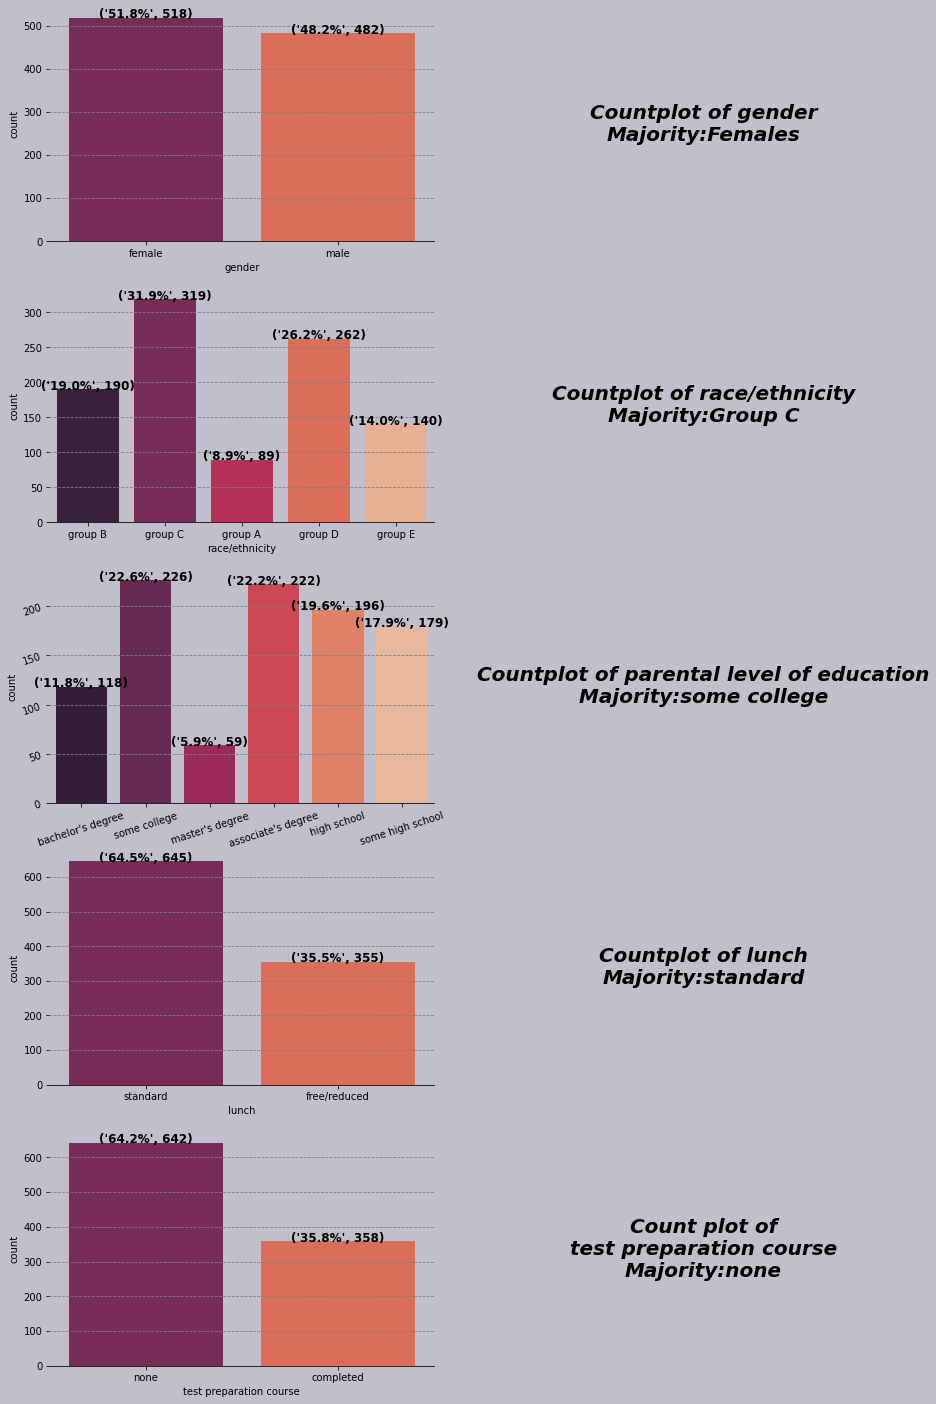

In [40]:
fig=plt.figure(figsize=(40,25))
grids=fig.add_gridspec(5,5)

ax00=fig.add_subplot(grids[0,0])
ax01=fig.add_subplot(grids[0,1])
ax10=fig.add_subplot(grids[1,0])
ax11=fig.add_subplot(grids[1,1])
ax20=fig.add_subplot(grids[2,0])
ax21=fig.add_subplot(grids[2,1])
ax30=fig.add_subplot(grids[3,0])
ax31=fig.add_subplot(grids[3,1])
ax40=fig.add_subplot(grids[4,0])
ax41=fig.add_subplot(grids[4,1])

axes=[ax00,ax01,ax10,ax11,ax20,ax21,ax30,ax31,ax40,ax41]
background_color=  "#c2bfcc"           #'#fdfefe'	#'#87CEEB'  #'#FFB6C1'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)


a1=sns.countplot(data=df,x='gender',palette='rocket',ax=ax00)
without_hue(df,'gender',a1)
ax01.text(0.5,0.5,"Countplot of gender\nMajority:Females",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')

a2=sns.countplot(data=df,x='race/ethnicity',palette='rocket',ax=ax10)
without_hue(df,'race/ethnicity',a2)
ax11.text(0.5,0.5,"Countplot of race/ethnicity\nMajority:Group C",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')

a3=sns.countplot(data=df,x='parental level of education',palette='rocket',ax=ax20)
without_hue(df,'parental level of education',a3)
ax21.text(0.5,0.5,"Countplot of parental level of education\nMajority:some college",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')
ax20.tick_params(labelrotation=18)

a4=sns.countplot(data=df,x='lunch',palette='rocket',ax=ax30)
without_hue(df,'lunch',a4)
ax31.text(0.5,0.5,"Countplot of lunch\nMajority:standard",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')

a5=sns.countplot(data=df,x='test preparation course',palette='rocket',ax=ax40)
without_hue(df,'test preparation course',a5)
ax41.text(0.5,0.5,"Count plot of\ntest preparation course\nMajority:none",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')



description=[ax01,ax11,ax21,ax31,ax41]
for i in description:
    i.spines['bottom'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.tick_params(left=False,bottom=False)
    i.set_xticklabels([])
    i.set_yticklabels([])
    
description_plots=[ax00,ax10,ax20,ax30,ax40]
for i in description_plots:
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.grid(linestyle="--",axis='y',color='gray')

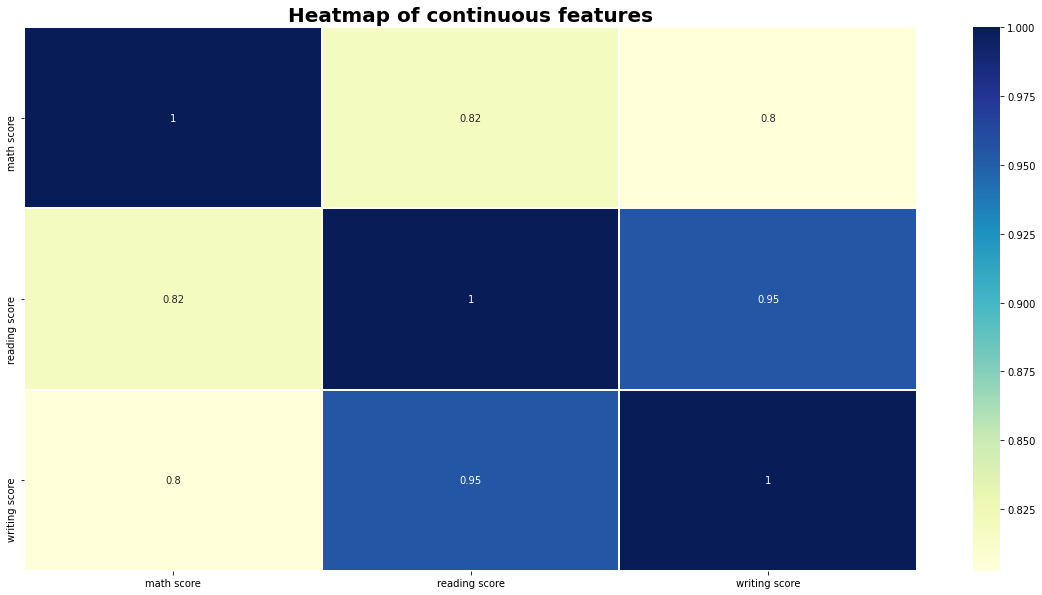

In [41]:


plt.figure(figsize=(20,10))
x_vars=['math score','reading score','writing score']
y_vars=['math score','reading score','writing score']
plt.title("Heatmap of continuous features",fontweight='bold',fontsize=20)
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu',linewidth=1)



In [42]:
print(df['math score'].median(),df['writing score'].median(),df['reading score'].median())

66.0 69.0 70.0


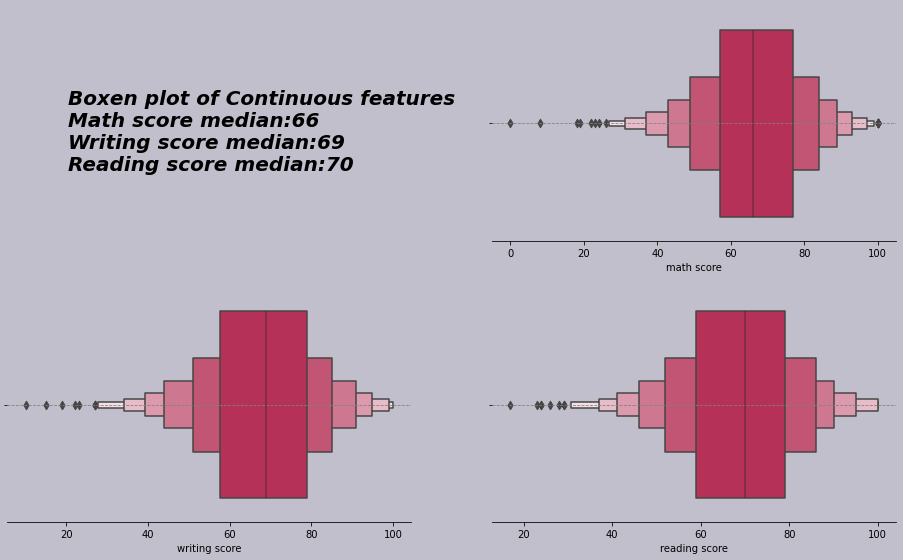

In [43]:
fig=plt.figure(figsize=(42,25))
grids=fig.add_gridspec(5,5)

ax00=fig.add_subplot(grids[0,0])
ax01=fig.add_subplot(grids[0,1])
ax10=fig.add_subplot(grids[1,0])
ax11=fig.add_subplot(grids[1,1])

axes=[ax00,ax01,ax10,ax11]
background_color=  "#c2bfcc"           #'#fdfefe'	#'#87CEEB'  #'#FFB6C1'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)


sns.boxenplot(data=df,x='math score',palette='rocket',ax=ax01)
sns.boxenplot(data=df,x='writing score',palette='rocket',ax=ax10)
sns.boxenplot(data=df,x='reading score',palette='rocket',ax=ax11)

description_plots=[ax01,ax10,ax11]
for i in description_plots:
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.grid(linestyle="--",axis='y',color='gray')
    
ax00.text(0.15,0.3,"Boxen plot of Continuous features\nMath score median:66\nWriting score median:69\nReading score median:70",fontsize=20,fontweight='bold',fontstyle='italic')
ax00.spines['bottom'].set_visible(False)
ax00.spines['left'].set_visible(False)
ax00.spines['top'].set_visible(False)
ax00.spines['right'].set_visible(False)
ax00.tick_params(left=False,bottom=False)
ax00.set_xticklabels([])
ax00.set_yticklabels([])
    
plt.show()



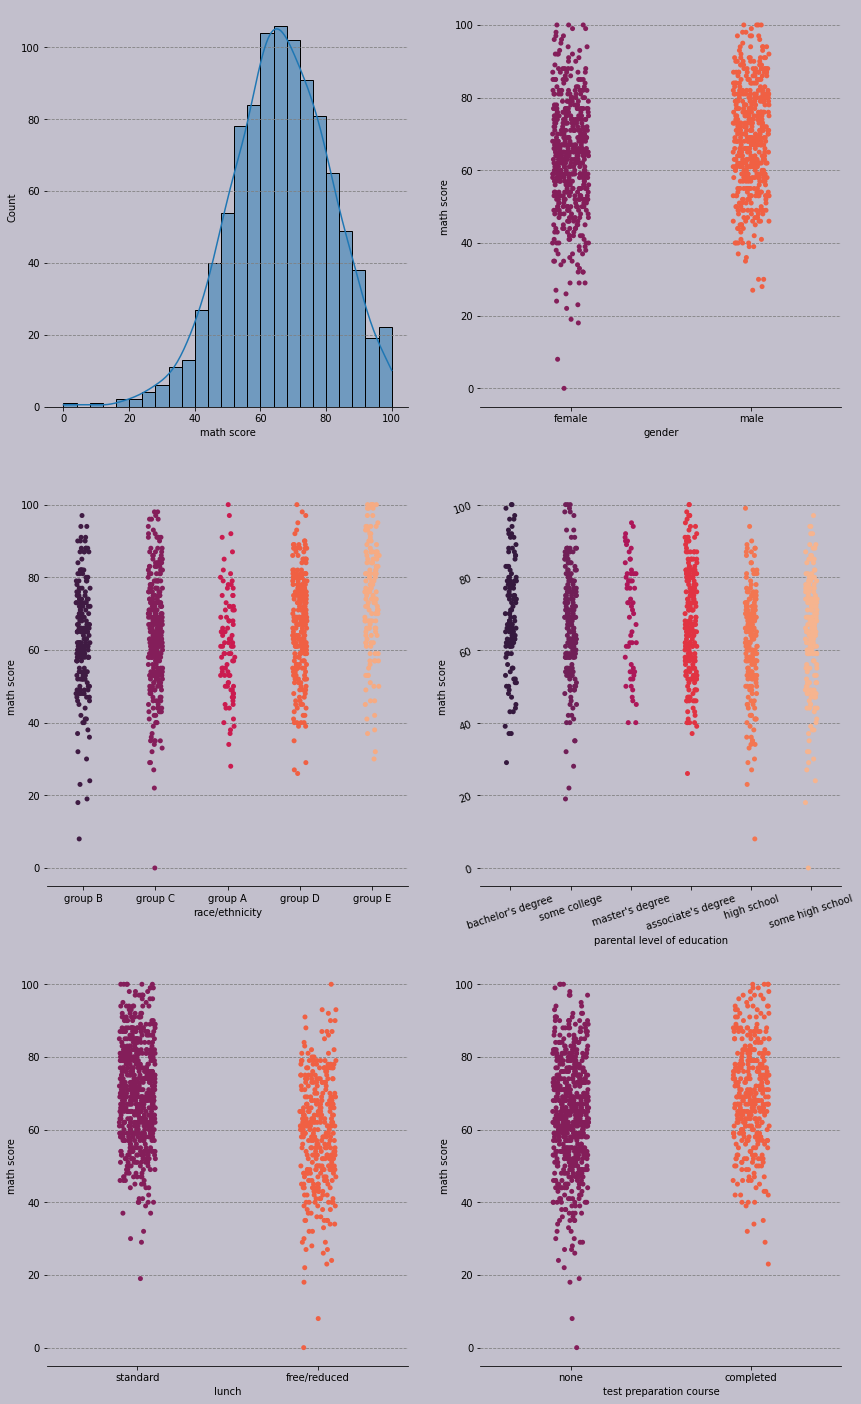

In [44]:


fig=plt.figure(figsize=(22,25))
grids=fig.add_gridspec(3,3)

ax00=fig.add_subplot(grids[0,0])
ax01=fig.add_subplot(grids[0,1])
ax10=fig.add_subplot(grids[1,0])
ax11=fig.add_subplot(grids[1,1])
ax20=fig.add_subplot(grids[2,0])
ax21=fig.add_subplot(grids[2,1])

axes=[ax00,ax01,ax10,ax11,ax20,ax21]
background_color=  "#c2bfcc"           #'#fdfefe'	#'#87CEEB'  #'#FFB6C1'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)

sns.histplot(df,x='math score',palette='rocket',kde=True,ax=ax00)
sns.stripplot(data=df,y='math score',x='gender',palette='rocket',ax=ax01)

sns.stripplot(data=df,y='math score',x='race/ethnicity',palette='rocket',ax=ax10)
sns.stripplot(data=df,y='math score',x='parental level of education',palette='rocket',ax=ax11)
ax11.tick_params(labelrotation=18)

sns.stripplot(data=df,y='math score',x='lunch',palette='rocket',ax=ax20)
sns.stripplot(data=df,y='math score',x='test preparation course',palette='rocket',ax=ax21)

description_plots=[ax00,ax01,ax10,ax11,ax20,ax21]
for i in description_plots:
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.grid(linestyle="--",axis='y',color='gray')



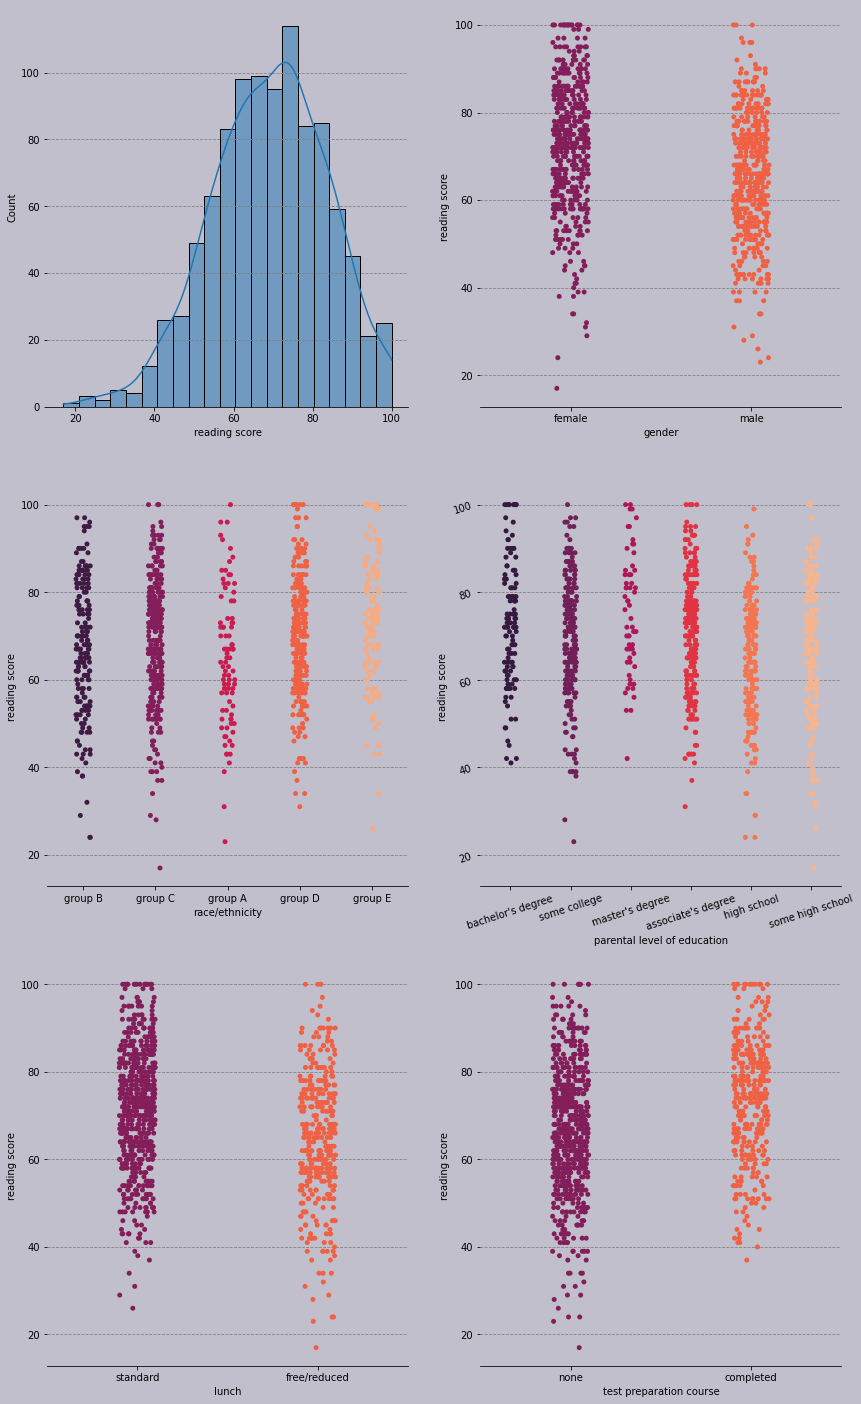

In [45]:
fig=plt.figure(figsize=(22,25))
grids=fig.add_gridspec(3,3)

ax00=fig.add_subplot(grids[0,0])
ax01=fig.add_subplot(grids[0,1])
ax10=fig.add_subplot(grids[1,0])
ax11=fig.add_subplot(grids[1,1])
ax20=fig.add_subplot(grids[2,0])
ax21=fig.add_subplot(grids[2,1])

axes=[ax00,ax01,ax10,ax11,ax20,ax21]
background_color=  "#c2bfcc"           #'#fdfefe'	#'#87CEEB'  #'#FFB6C1'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)

sns.histplot(df,x='reading score',palette='rocket',kde=True,ax=ax00)
sns.stripplot(data=df,y='reading score',x='gender',palette='rocket',ax=ax01)

sns.stripplot(data=df,y='reading score',x='race/ethnicity',palette='rocket',ax=ax10)
sns.stripplot(data=df,y='reading score',x='parental level of education',palette='rocket',ax=ax11)
ax11.tick_params(labelrotation=18)

sns.stripplot(data=df,y='reading score',x='lunch',palette='rocket',ax=ax20)
sns.stripplot(data=df,y='reading score',x='test preparation course',palette='rocket',ax=ax21)
description_plots=[ax00,ax01,ax10,ax11,ax20,ax21]
for i in description_plots:
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.grid(linestyle="--",axis='y',color='gray')



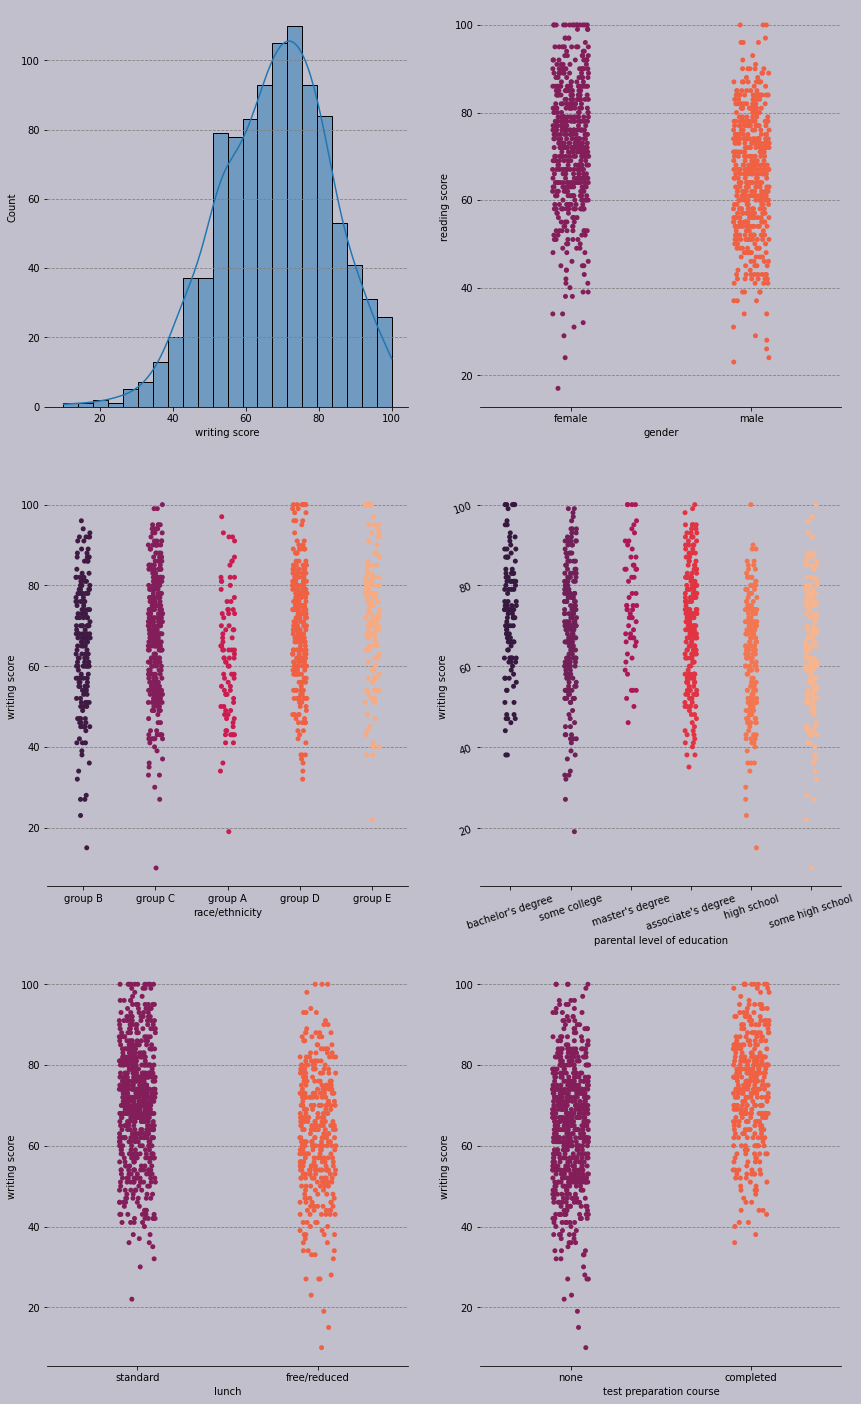

In [46]:
fig=plt.figure(figsize=(22,25))
grids=fig.add_gridspec(3,3)

ax00=fig.add_subplot(grids[0,0])
ax01=fig.add_subplot(grids[0,1])
ax10=fig.add_subplot(grids[1,0])
ax11=fig.add_subplot(grids[1,1])
ax20=fig.add_subplot(grids[2,0])
ax21=fig.add_subplot(grids[2,1])

axes=[ax00,ax01,ax10,ax11,ax20,ax21]
background_color=  "#c2bfcc"           #'#fdfefe'	#'#87CEEB'  #'#FFB6C1'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)

sns.histplot(df,x='writing score',palette='rocket',kde=True,ax=ax00)
sns.stripplot(data=df,y='reading score',x='gender',palette='rocket',ax=ax01)

sns.stripplot(data=df,y='writing score',x='race/ethnicity',palette='rocket',ax=ax10)
sns.stripplot(data=df,y='writing score',x='parental level of education',palette='rocket',ax=ax11)
ax11.tick_params(labelrotation=18)

sns.stripplot(data=df,y='writing score',x='lunch',palette='rocket',ax=ax20)
sns.stripplot(data=df,y='writing score',x='test preparation course',palette='rocket',ax=ax21)

description_plots=[ax00,ax01,ax10,ax11,ax20,ax21]
for i in description_plots:
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.grid(linestyle="--",axis='y',color='gray')

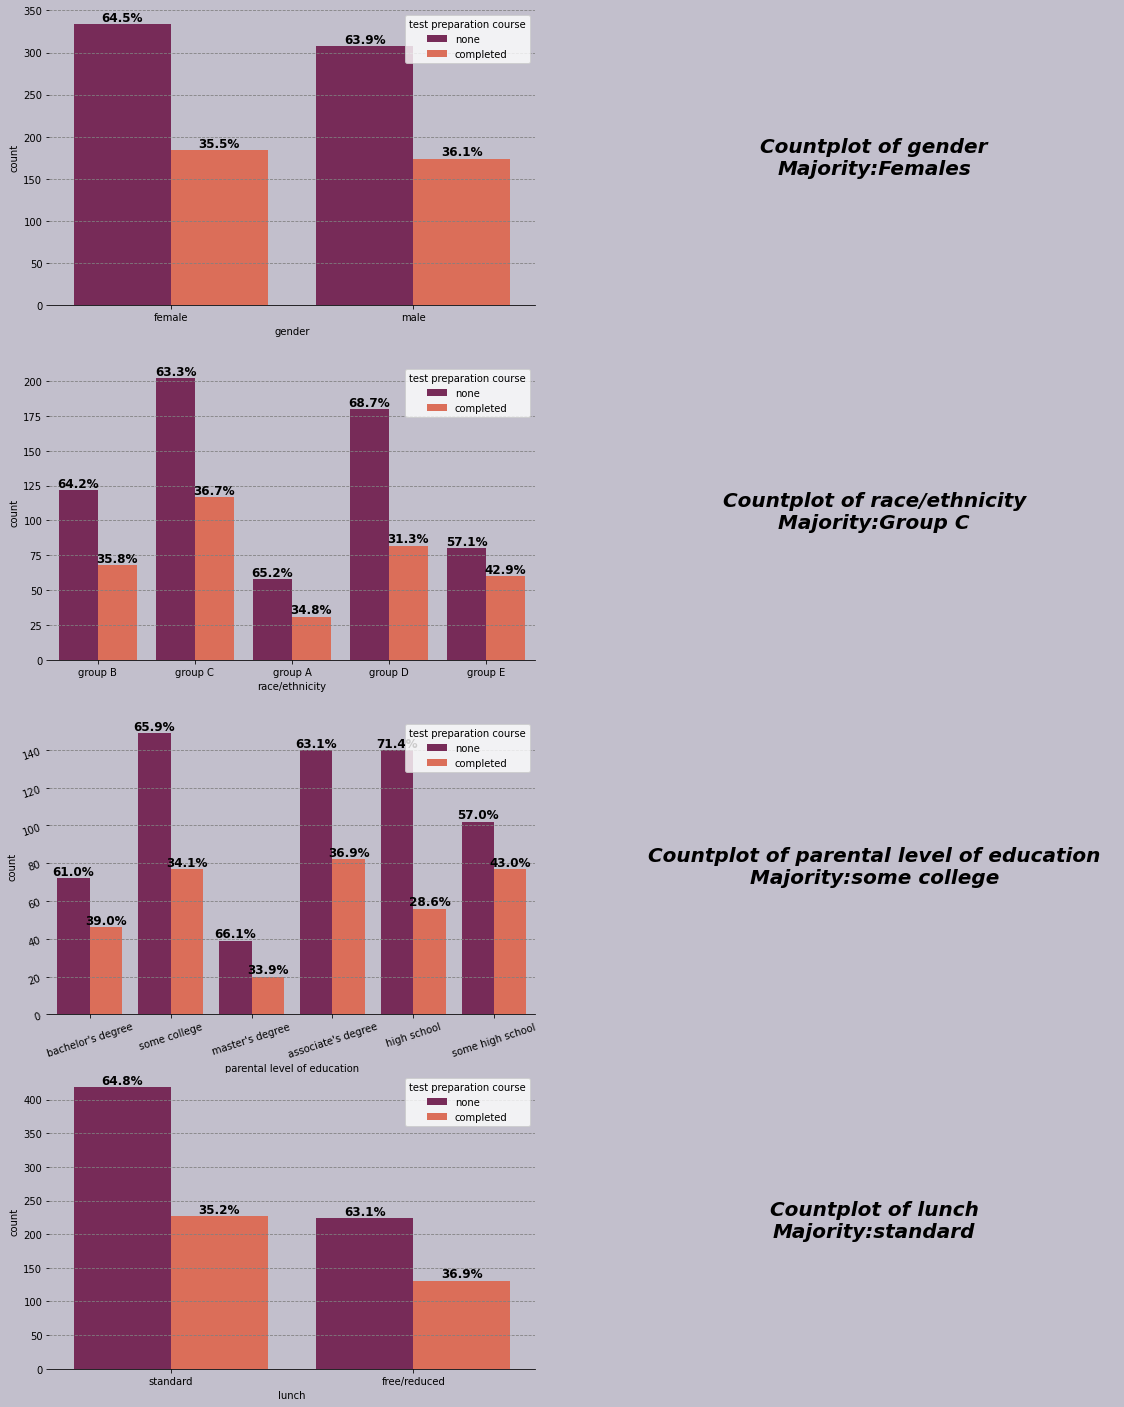

In [47]:
fig=plt.figure(figsize=(40,25))
grids=fig.add_gridspec(4,4)

ax00=fig.add_subplot(grids[0,0])
ax01=fig.add_subplot(grids[0,1])
ax10=fig.add_subplot(grids[1,0])
ax11=fig.add_subplot(grids[1,1])
ax20=fig.add_subplot(grids[2,0])
ax21=fig.add_subplot(grids[2,1])
ax30=fig.add_subplot(grids[3,0])
ax31=fig.add_subplot(grids[3,1])

axes=[ax00,ax01,ax10,ax11,ax20,ax21,ax30,ax31]
background_color=  "#c2bfcc"           #'#fdfefe'	#'#87CEEB'  #'#FFB6C1'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)


a1=sns.countplot(data=df,x='gender',palette='rocket',hue='test preparation course',ax=ax00)
with_hue(df,'gender',a1)
ax01.text(0.5,0.5,"Countplot of gender\nMajority:Females",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')

a2=sns.countplot(data=df,x='race/ethnicity',palette='rocket',ax=ax10,hue='test preparation course')
with_hue(df,'race/ethnicity',a2)
ax11.text(0.5,0.5,"Countplot of race/ethnicity\nMajority:Group C",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')

a3=sns.countplot(data=df,x='parental level of education',palette='rocket',ax=ax20,hue='test preparation course')
with_hue(df,'parental level of education',a3)
ax21.text(0.5,0.5,"Countplot of parental level of education\nMajority:some college",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')
ax20.tick_params(labelrotation=18)

a4=sns.countplot(data=df,x='lunch',palette='rocket',ax=ax30,hue='test preparation course')
with_hue(df,'lunch',a4)
ax31.text(0.5,0.5,"Countplot of lunch\nMajority:standard",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')



description=[ax01,ax11,ax21,ax31]
for i in description:
    i.spines['bottom'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.tick_params(left=False,bottom=False)
    i.set_xticklabels([])
    i.set_yticklabels([])
    
description_plots=[ax00,ax10,ax20,ax30]
for i in description_plots:
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.grid(linestyle="--",axis='y',color='gray')

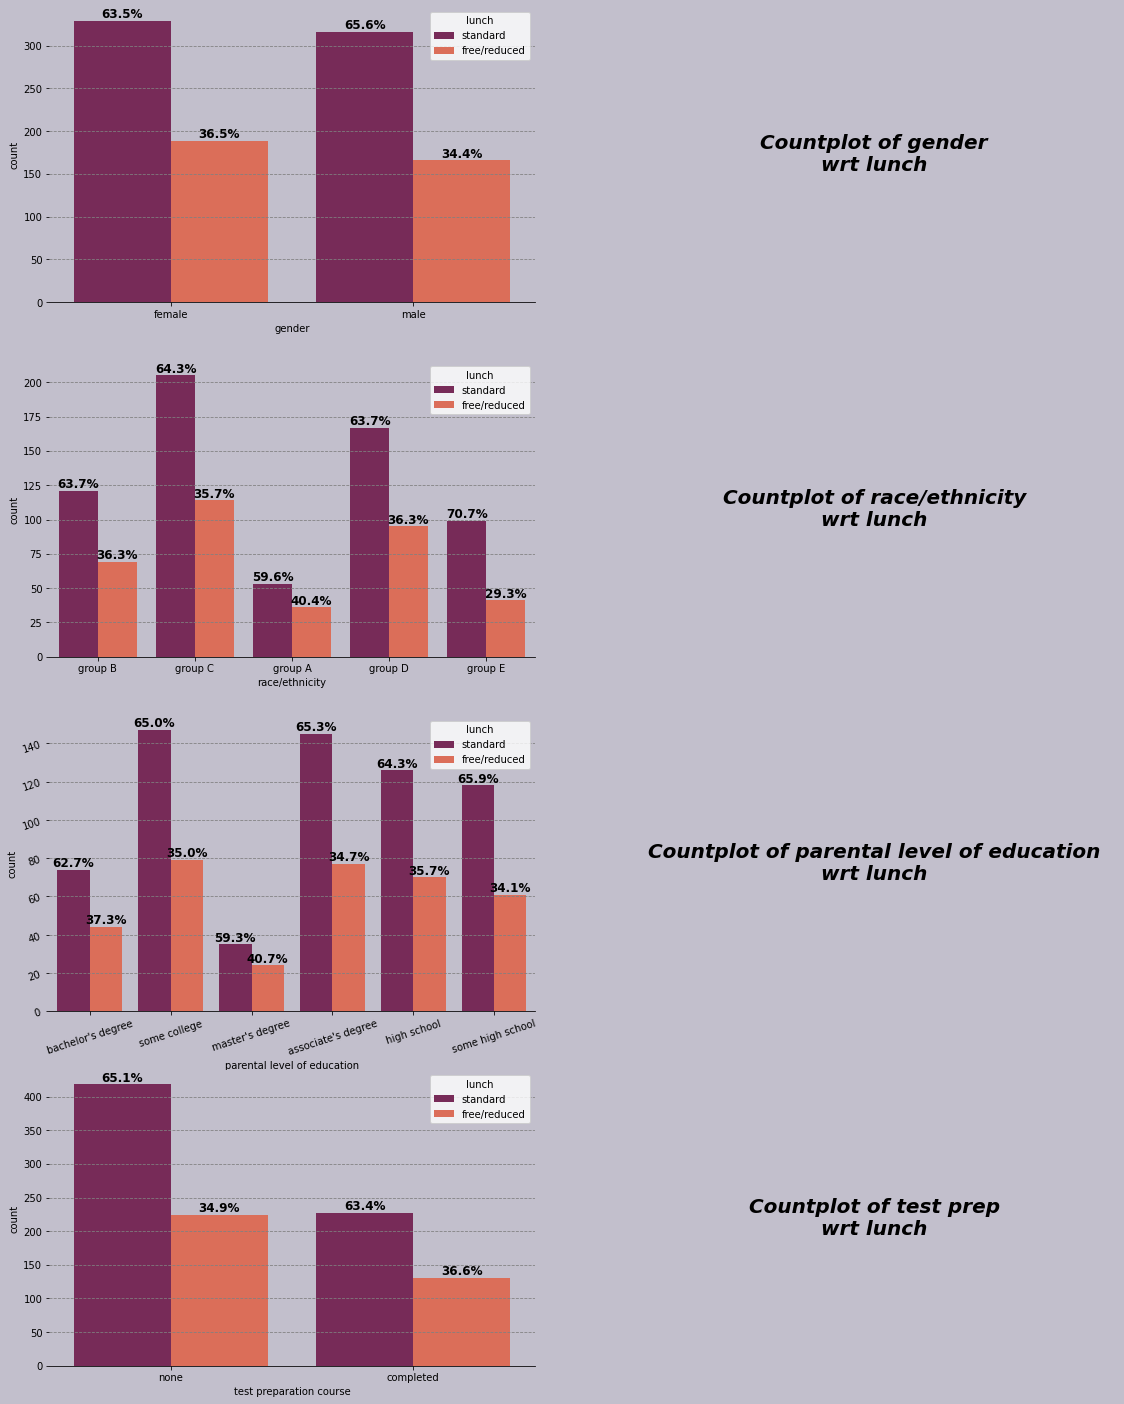

In [48]:
fig=plt.figure(figsize=(40,25))
grids=fig.add_gridspec(4,4)

ax00=fig.add_subplot(grids[0,0])
ax01=fig.add_subplot(grids[0,1])
ax10=fig.add_subplot(grids[1,0])
ax11=fig.add_subplot(grids[1,1])
ax20=fig.add_subplot(grids[2,0])
ax21=fig.add_subplot(grids[2,1])
ax30=fig.add_subplot(grids[3,0])
ax31=fig.add_subplot(grids[3,1])

axes=[ax00,ax01,ax10,ax11,ax20,ax21,ax30,ax31]
background_color=  "#c2bfcc"           #'#fdfefe'	#'#87CEEB'  #'#FFB6C1'
for i in axes:
    i.set_facecolor(background_color)
fig.patch.set_facecolor(background_color)


a1=sns.countplot(data=df,x='gender',palette='rocket',hue='lunch',ax=ax00)
with_hue(df,'gender',a1)
ax01.text(0.5,0.5,"Countplot of gender\nwrt lunch",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')

a2=sns.countplot(data=df,x='race/ethnicity',palette='rocket',ax=ax10,hue='lunch')
with_hue(df,'race/ethnicity',a2)
ax11.text(0.5,0.5,"Countplot of race/ethnicity\nwrt lunch",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')

a3=sns.countplot(data=df,x='parental level of education',palette='rocket',ax=ax20,hue='lunch')
with_hue(df,'parental level of education',a3)
ax21.text(0.5,0.5,"Countplot of parental level of education\nwrt lunch",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')
ax20.tick_params(labelrotation=18)

a4=sns.countplot(data=df,x='test preparation course',palette='rocket',ax=ax30,hue='lunch')
with_hue(df,'lunch',a4)
ax31.text(0.5,0.5,"Countplot of test prep\nwrt lunch",horizontalalignment='center',verticalalignment='center',
         fontweight='bold',fontsize=20,fontstyle='italic')



description=[ax01,ax11,ax21,ax31]
for i in description:
    i.spines['bottom'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.tick_params(left=False,bottom=False)
    i.set_xticklabels([])
    i.set_yticklabels([])
    
description_plots=[ax00,ax10,ax20,ax30]
for i in description_plots:
    i.spines['top'].set_visible(False)
    i.spines['right'].set_visible(False)
    i.spines['left'].set_visible(False)
    i.grid(linestyle="--",axis='y',color='gray')

In [49]:
!git remote -v

origin	https://github.com/MadsRN/mads.git (fetch)
origin	https://github.com/MadsRN/mads.git (push)


In [52]:
!git add -A